# Objective

# Importing Libraries

In [396]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Description

| Variable | Definition |
| --- | --- |
| Trip_ID | ID for TRIP |
| Trip_Distance | The distance for the trip requested by the customer |
| TypeofCab| Category of the cab requested by the custome |
| CustomerSinceMonths| Customer using cab services since n months; 0 month means current month |
| LifeStyleIndex | Proprietary index created by Sigma Cabs showing lifestyle of the customer based on their behaviour  |
| ConfidenceLifeStyle_Index | Category showing confidence on the index mentioned above |
| Destination_Type | Sigma Cabs divides any destination in one of the 14 categories. |
| Customer_Rating | Average of life time ratings of the customer till date |
| CancellationLast1Month | Number of trips cancelled by the customer in last 1 month |
| Var1, Var2 and Var3 |  Continuous variables masked by the company. Can be used for modelling purposes |
| Gender | Gender of the customer |
| SurgePricingType | Target (can be of 3 types) |

# Dataset Description

In [397]:
df = pd.read_csv('sigma_cabs.csv')
df.head()

,Trip_ID,Trip_Distance,Type_of_Cab,Customer_Since_Months,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Gender,Surge_Pricing_Type
0,T0005689460,6.77,B,1.0,2.42769,A,A,3.90500,0,40.0,46,60,Female,2
1,T0005689461,29.47,B,10.0,2.78245,B,A,3.45000,0,38.0,56,78,Male,2
2,T0005689464,41.58,NaN,10.0,NaN,NaN,E,3.50125,2,NaN,56,77,Male,2
3,T0005689465,61.56,C,10.0,NaN,NaN,A,3.45375,0,NaN,52,74,Male,3
4,T0005689467,54.95,C,10.0,3.03453,B,A,3.40250,4,51.0,49,102,Male,2


In [398]:
# Shape of the dataset
df.shape

(131662, 14)

In [399]:
# checking categorical and numerical variables

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131662 entries, 0 to 131661
Data columns (total 14 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Trip_ID                      131662 non-null  object 
 1   Trip_Distance                131662 non-null  float64
 2   Type_of_Cab                  111452 non-null  object 
 3   Customer_Since_Months        125742 non-null  float64
 4   Life_Style_Index             111469 non-null  float64
 5   Confidence_Life_Style_Index  111469 non-null  object 
 6   Destination_Type             131662 non-null  object 
 7   Customer_Rating              131662 non-null  float64
 8   Cancellation_Last_1Month     131662 non-null  int64  
 9   Var1                         60632 non-null   float64
 10  Var2                         131662 non-null  int64  
 11  Var3                         131662 non-null  int64  
 12  Gender                       131662 non-null  object 
 13 

In [400]:
# Numerical columns
df_num = df.select_dtypes(include=['float64','int64'])
df_num.columns

Index(['Trip_Distance', 'Customer_Since_Months', 'Life_Style_Index',
       'Customer_Rating', 'Cancellation_Last_1Month', 'Var1', 'Var2', 'Var3',
       'Surge_Pricing_Type'],
      dtype='object')

In [401]:
# Categorical columns
df_catg = df.select_dtypes(include=['object'])
df_catg.columns

Index(['Trip_ID', 'Type_of_Cab', 'Confidence_Life_Style_Index',
       'Destination_Type', 'Gender'],
      dtype='object')

In [402]:
# Five point summary

df.describe().T
# In this we can see count,mean,std,min,quartile range,max of every variable
# while watching count we can observe that we have missing values

,count,mean,std,min,25%,50%,75%,max
Trip_Distance,131662.0,44.200909,25.522882,0.31000,24.58000,38.20000,60.73000,109.23000
Customer_Since_Months,125742.0,6.016661,3.626887,0.00000,3.00000,6.00000,10.00000,10.00000
Life_Style_Index,111469.0,2.802064,0.225796,1.59638,2.65473,2.79805,2.94678,4.87511
Customer_Rating,131662.0,2.849458,0.980675,0.00125,2.15250,2.89500,3.58250,5.00000
Cancellation_Last_1Month,131662.0,0.782838,1.037559,0.00000,0.00000,0.00000,1.00000,8.00000
Var1,60632.0,64.202698,21.820447,30.00000,46.00000,61.00000,80.00000,210.00000
Var2,131662.0,51.202800,4.986142,40.00000,48.00000,50.00000,54.00000,124.00000
Var3,131662.0,75.099019,11.578278,52.00000,67.00000,74.00000,82.00000,206.00000
Surge_Pricing_Type,131662.0,2.155747,0.738164,1.00000,2.00000,2.00000,3.00000,3.00000


In [403]:
# Five point summary for catg variables
df.describe(include = 'object').T

# This shows the total number of non-null observations, count of unique values, mode of values and its name.

,count,unique,top,freq
Trip_ID,131662,131662,T0005747715,1
Type_of_Cab,111452,5,B,31136
Confidence_Life_Style_Index,111469,3,B,40355
Destination_Type,131662,14,A,77597
Gender,131662,2,Male,93900


# Analysis

In [404]:
df.columns

Index(['Trip_ID', 'Trip_Distance', 'Type_of_Cab', 'Customer_Since_Months',
       'Life_Style_Index', 'Confidence_Life_Style_Index', 'Destination_Type',
       'Customer_Rating', 'Cancellation_Last_1Month', 'Var1', 'Var2', 'Var3',
       'Gender', 'Surge_Pricing_Type'],
      dtype='object')

In [405]:
df.head()

,Trip_ID,Trip_Distance,Type_of_Cab,Customer_Since_Months,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Gender,Surge_Pricing_Type
0,T0005689460,6.77,B,1.0,2.42769,A,A,3.90500,0,40.0,46,60,Female,2
1,T0005689461,29.47,B,10.0,2.78245,B,A,3.45000,0,38.0,56,78,Male,2
2,T0005689464,41.58,NaN,10.0,NaN,NaN,E,3.50125,2,NaN,56,77,Male,2
3,T0005689465,61.56,C,10.0,NaN,NaN,A,3.45375,0,NaN,52,74,Male,3
4,T0005689467,54.95,C,10.0,3.03453,B,A,3.40250,4,51.0,49,102,Male,2


# Surge_Pricing_Type(Target variable)

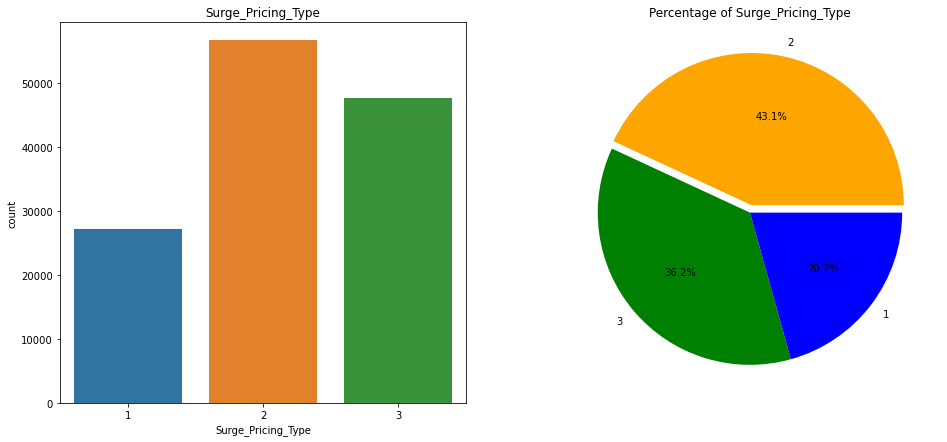

In [406]:
plt.figure(figsize=(16,7))

plt.subplot(1,2,1)
plt.title('Surge_Pricing_Type')
sns.countplot(df['Surge_Pricing_Type'])

plt.subplot(1,2,2)
plt.pie(df['Surge_Pricing_Type'].value_counts(), explode=[0.05,0,0] , colors=[ 'orange', 'green', 'blue'] ,autopct='%.1f%%', labels=['2', '3', '1'], labeldistance=1.1)
plt.title('Percentage of Surge_Pricing_Type')

plt.show()

In [407]:
df['Surge_Pricing_Type'].value_counts()

2    56728
3    47720
1    27214
Name: Surge_Pricing_Type, dtype: int64

# Trip_Distance

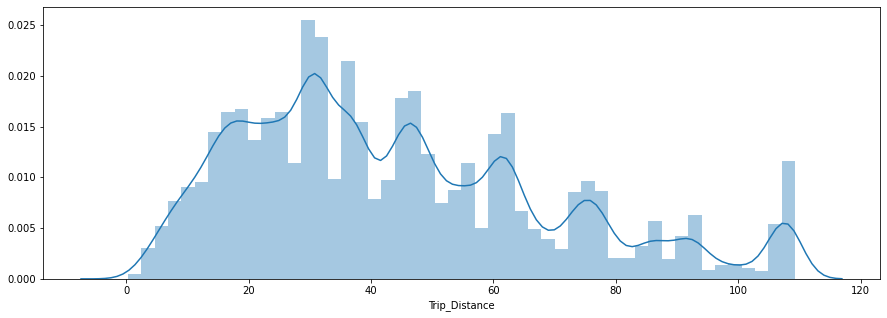

In [408]:
plt.figure(figsize=(15,5))
sns.distplot(df['Trip_Distance'])
plt.xlabel('Trip_Distance')
plt.show()

In [409]:
df['Trip_Distance'].max()

109.23

In [410]:
df['Trip_Distance'].min()

0.31

# Type_of_Cab

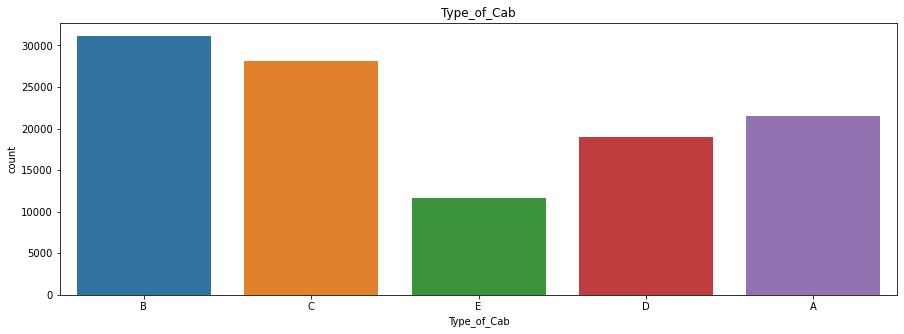

In [411]:
plt.figure(figsize=(15,5))
sns.countplot(df['Type_of_Cab'])
plt.title('Type_of_Cab')
plt.show()

# Customer_Since_Months

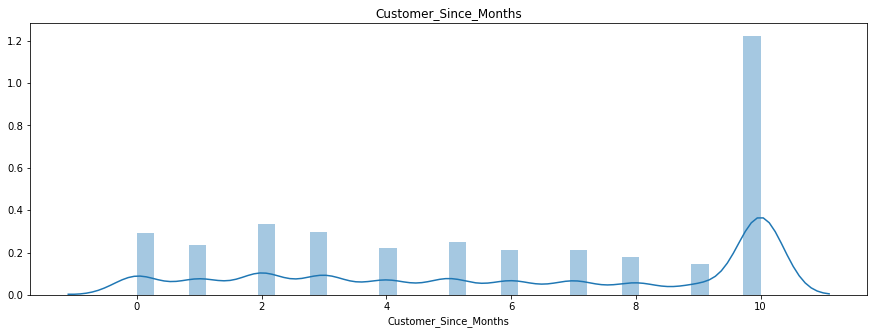

In [412]:
plt.figure(figsize=(15,5))
sns.distplot(df['Customer_Since_Months'])
plt.title('Customer_Since_Months')
plt.show()

# Life_Style_Index

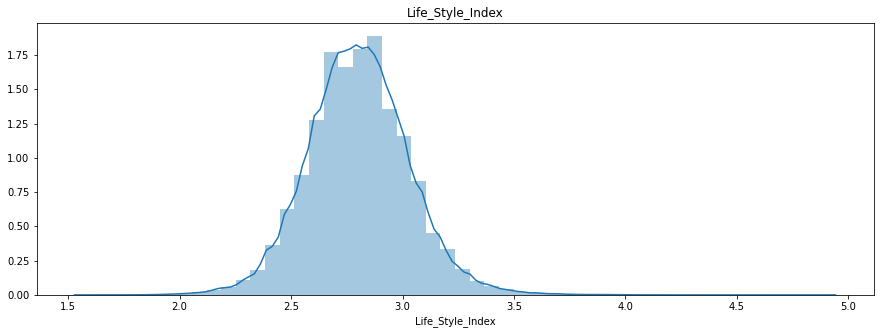

In [413]:
plt.figure(figsize=(15,5))
sns.distplot(df['Life_Style_Index'])
plt.title('Life_Style_Index')
plt.show()

# Confidence_Life_Style_Index

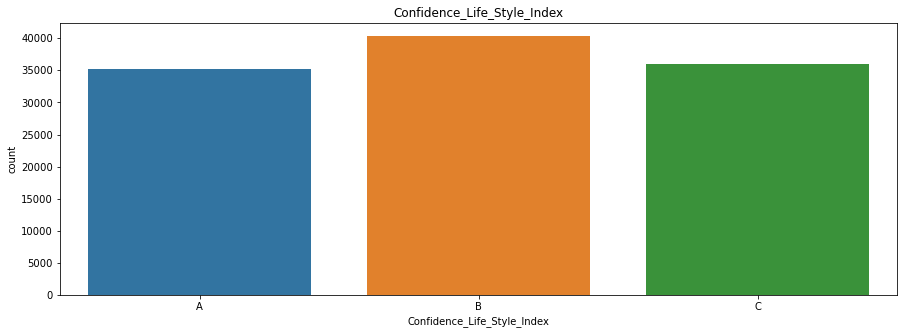

In [414]:
plt.figure(figsize=(15,5))
sns.countplot(df['Confidence_Life_Style_Index'])
plt.title('Confidence_Life_Style_Index')
plt.show()

# Destination_Type

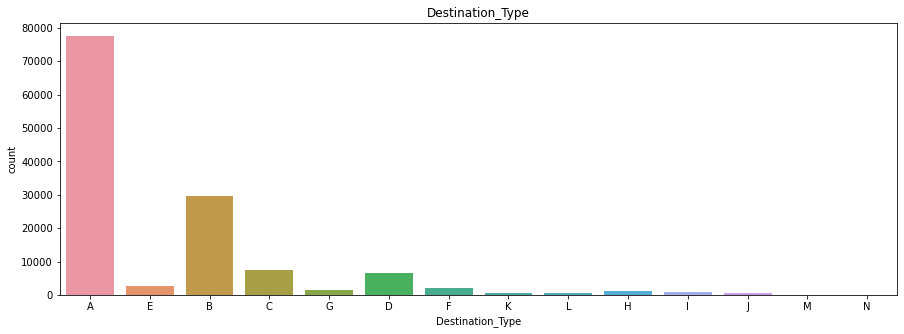

In [415]:
plt.figure(figsize=(15,5))
sns.countplot(df['Destination_Type'])
plt.title('Destination_Type')
plt.show()

# Customer_Rating

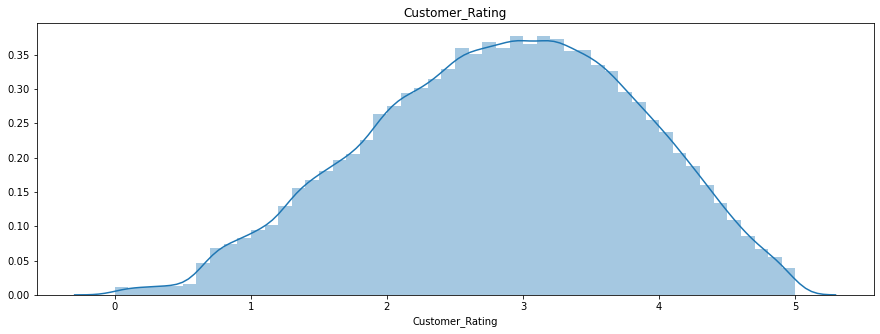

In [416]:
plt.figure(figsize=(15,5))
sns.distplot(df['Customer_Rating'])
plt.title('Customer_Rating')
plt.show()

# Cancellation_Last_1Month

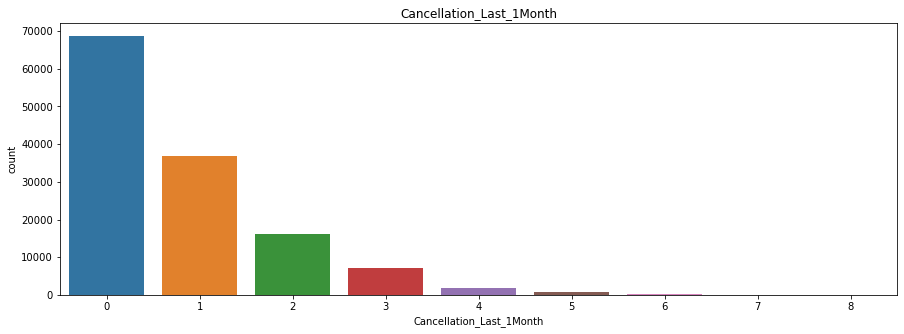

In [417]:
plt.figure(figsize=(15,5))
sns.countplot(df['Cancellation_Last_1Month'])
plt.title('Cancellation_Last_1Month')
plt.show()

In [418]:
df['Cancellation_Last_1Month'].value_counts()/df['Cancellation_Last_1Month'].shape[0]*100

0    52.169191
1    27.976181
2    12.321703
3     5.424496
4     1.384606
5     0.507360
6     0.202032
7     0.012152
8     0.002279
Name: Cancellation_Last_1Month, dtype: float64

# Gender

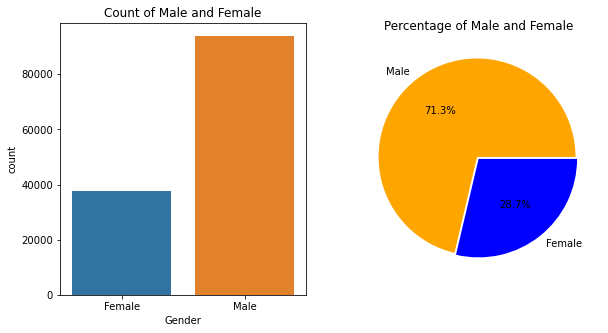

In [419]:
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.title('Count of Male and Female')
sns.countplot(df['Gender'])

plt.subplot(1,3,2)
plt.pie(df['Gender'].value_counts(), explode=[0.025,0] ,autopct='%.1f%%', labels=['Male', 'Female'],colors = ['orange','blue'], labeldistance=1.1)
plt.title('Percentage of Male and Female')


plt.show()

# Var1,Var2,Var3

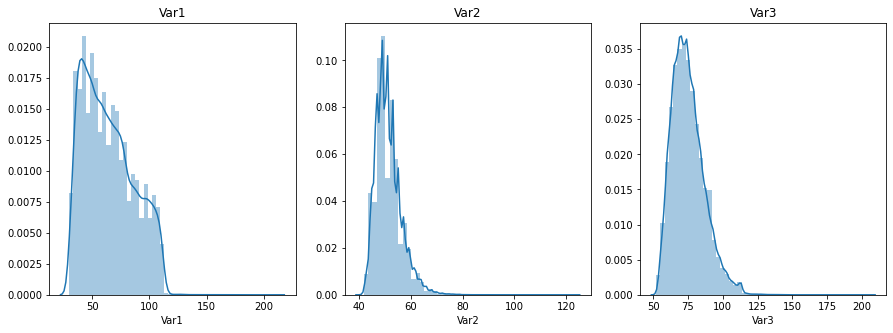

In [420]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.distplot(df['Var1'])
plt.title('Var1')

plt.subplot(1,3,2)
sns.distplot(df['Var2'])
plt.title('Var2')

plt.subplot(1,3,3)
sns.distplot(df['Var3'])
plt.title('Var3')

plt.show()

# Surge_Pricing_Type

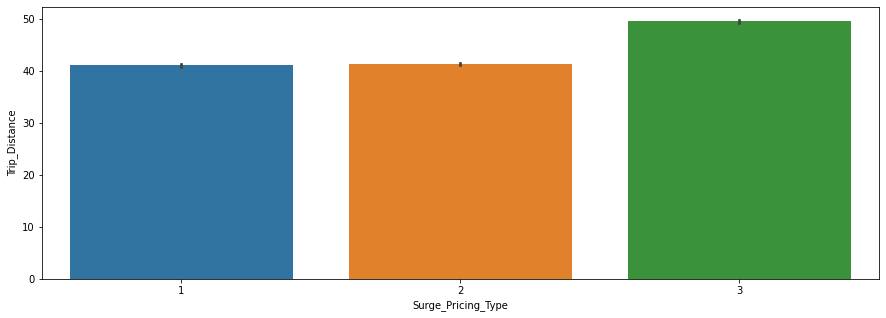

In [421]:
plt.figure(figsize=(15,5))
sns.barplot(df['Surge_Pricing_Type'],df['Trip_Distance'])
plt.show()

# Type_of_Cab vs Surge_Pricing_Type

<Figure size 1080x360 with 0 Axes>

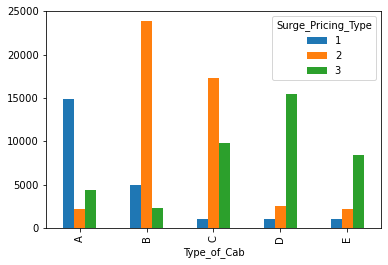

In [422]:
plt.figure(figsize=(15,5))
pd.crosstab(df['Type_of_Cab'],df['Surge_Pricing_Type']).plot(kind = 'bar')
plt.show()

# Gender vs Surge_Pricing_Type

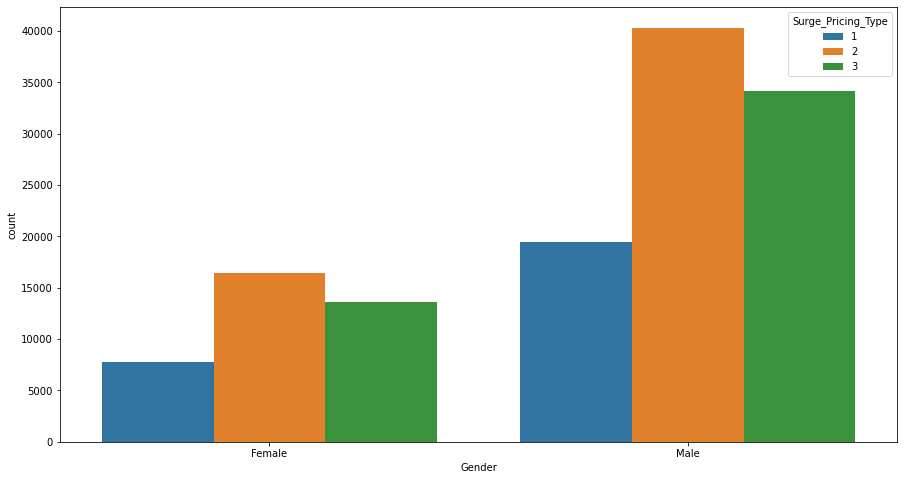

In [423]:
plt.figure(figsize=(15,8))
sns.countplot(df['Gender'],hue = df['Surge_Pricing_Type'])
plt.show()

# Type_of_Cab vs Trip_Distance

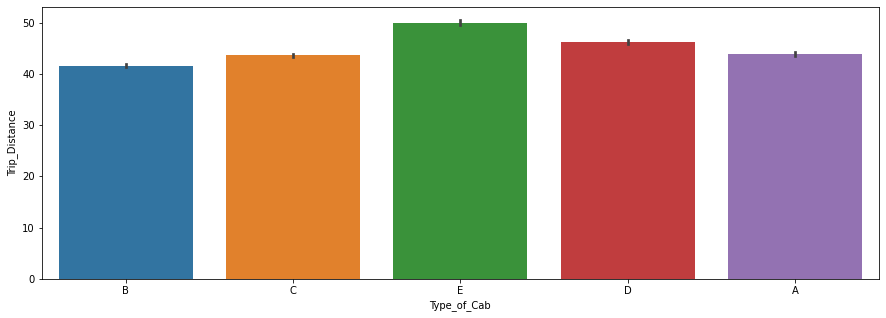

In [424]:
plt.figure(figsize=(15,5))
sns.barplot(df['Type_of_Cab'],df['Trip_Distance'])
plt.show()

# Gender vs Customer_Rating

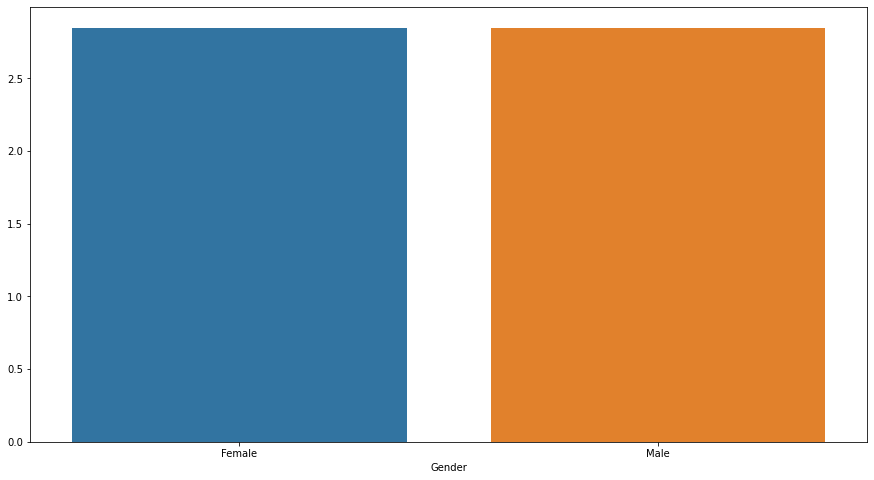

In [425]:
plt.figure(figsize=(15,8))
sns.barplot(df['Gender'],df['Customer_Rating'].mean())
plt.show()

# Gender vs Customer_Rating w.r.t Surge_Pricing_Type

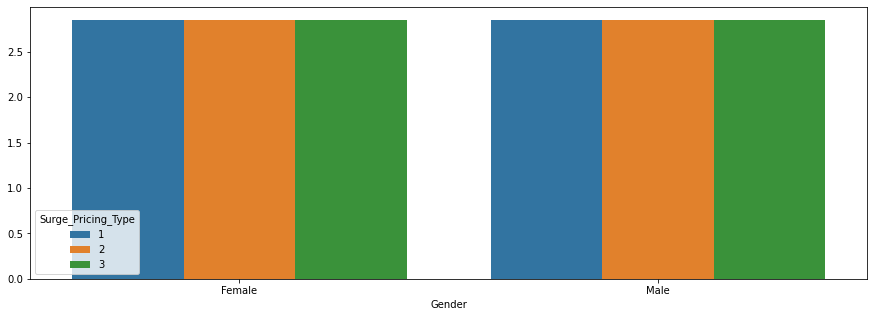

In [426]:
plt.figure(figsize=(15,5))
sns.barplot(df['Gender'],df['Customer_Rating'].mean(),df['Surge_Pricing_Type'])
plt.show()

# Surge_Pricing_Type vs Life_Style_Index

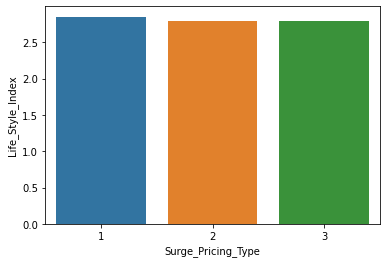

In [427]:
sns.barplot(df['Surge_Pricing_Type'],df['Life_Style_Index'])
plt.show()

# Type_of_Cab vs Trip_Distance w.r.t Surge_Pricing_Type

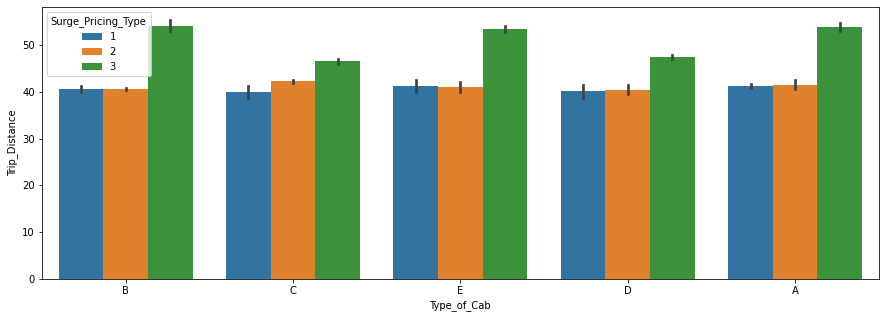

In [428]:
plt.figure(figsize=(15,5))
sns.barplot(df['Type_of_Cab'],df['Trip_Distance'],hue = df['Surge_Pricing_Type'])
plt.show()

# Gender vs Customer_Rating w.r.t Surge_Pricing_Type

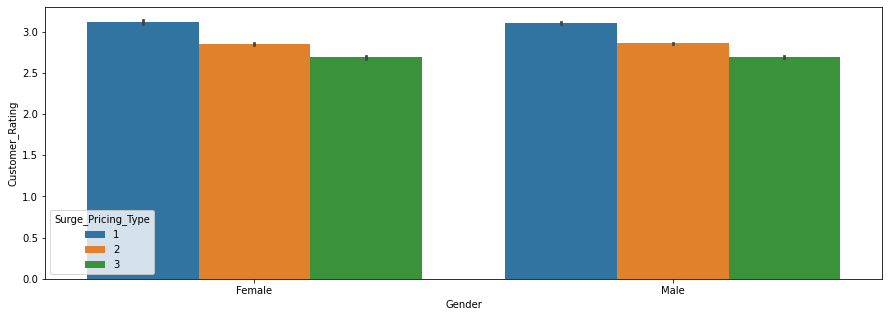

In [429]:
plt.figure(figsize=(15,5))
sns.barplot(df['Gender'],df['Customer_Rating'],hue = df['Surge_Pricing_Type'])
plt.show()

# Cancellation_Last_1Month vs Surge_Pricing_Type

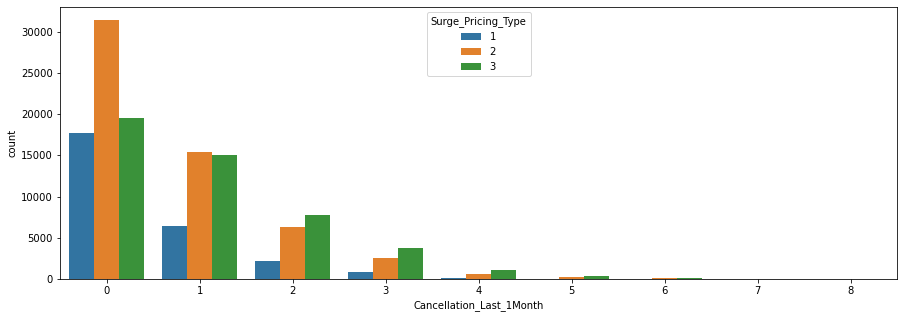

In [430]:
plt.figure(figsize=(15,5))
sns.countplot(df['Cancellation_Last_1Month'],hue = df['Surge_Pricing_Type'])
plt.show()

# Pairplot

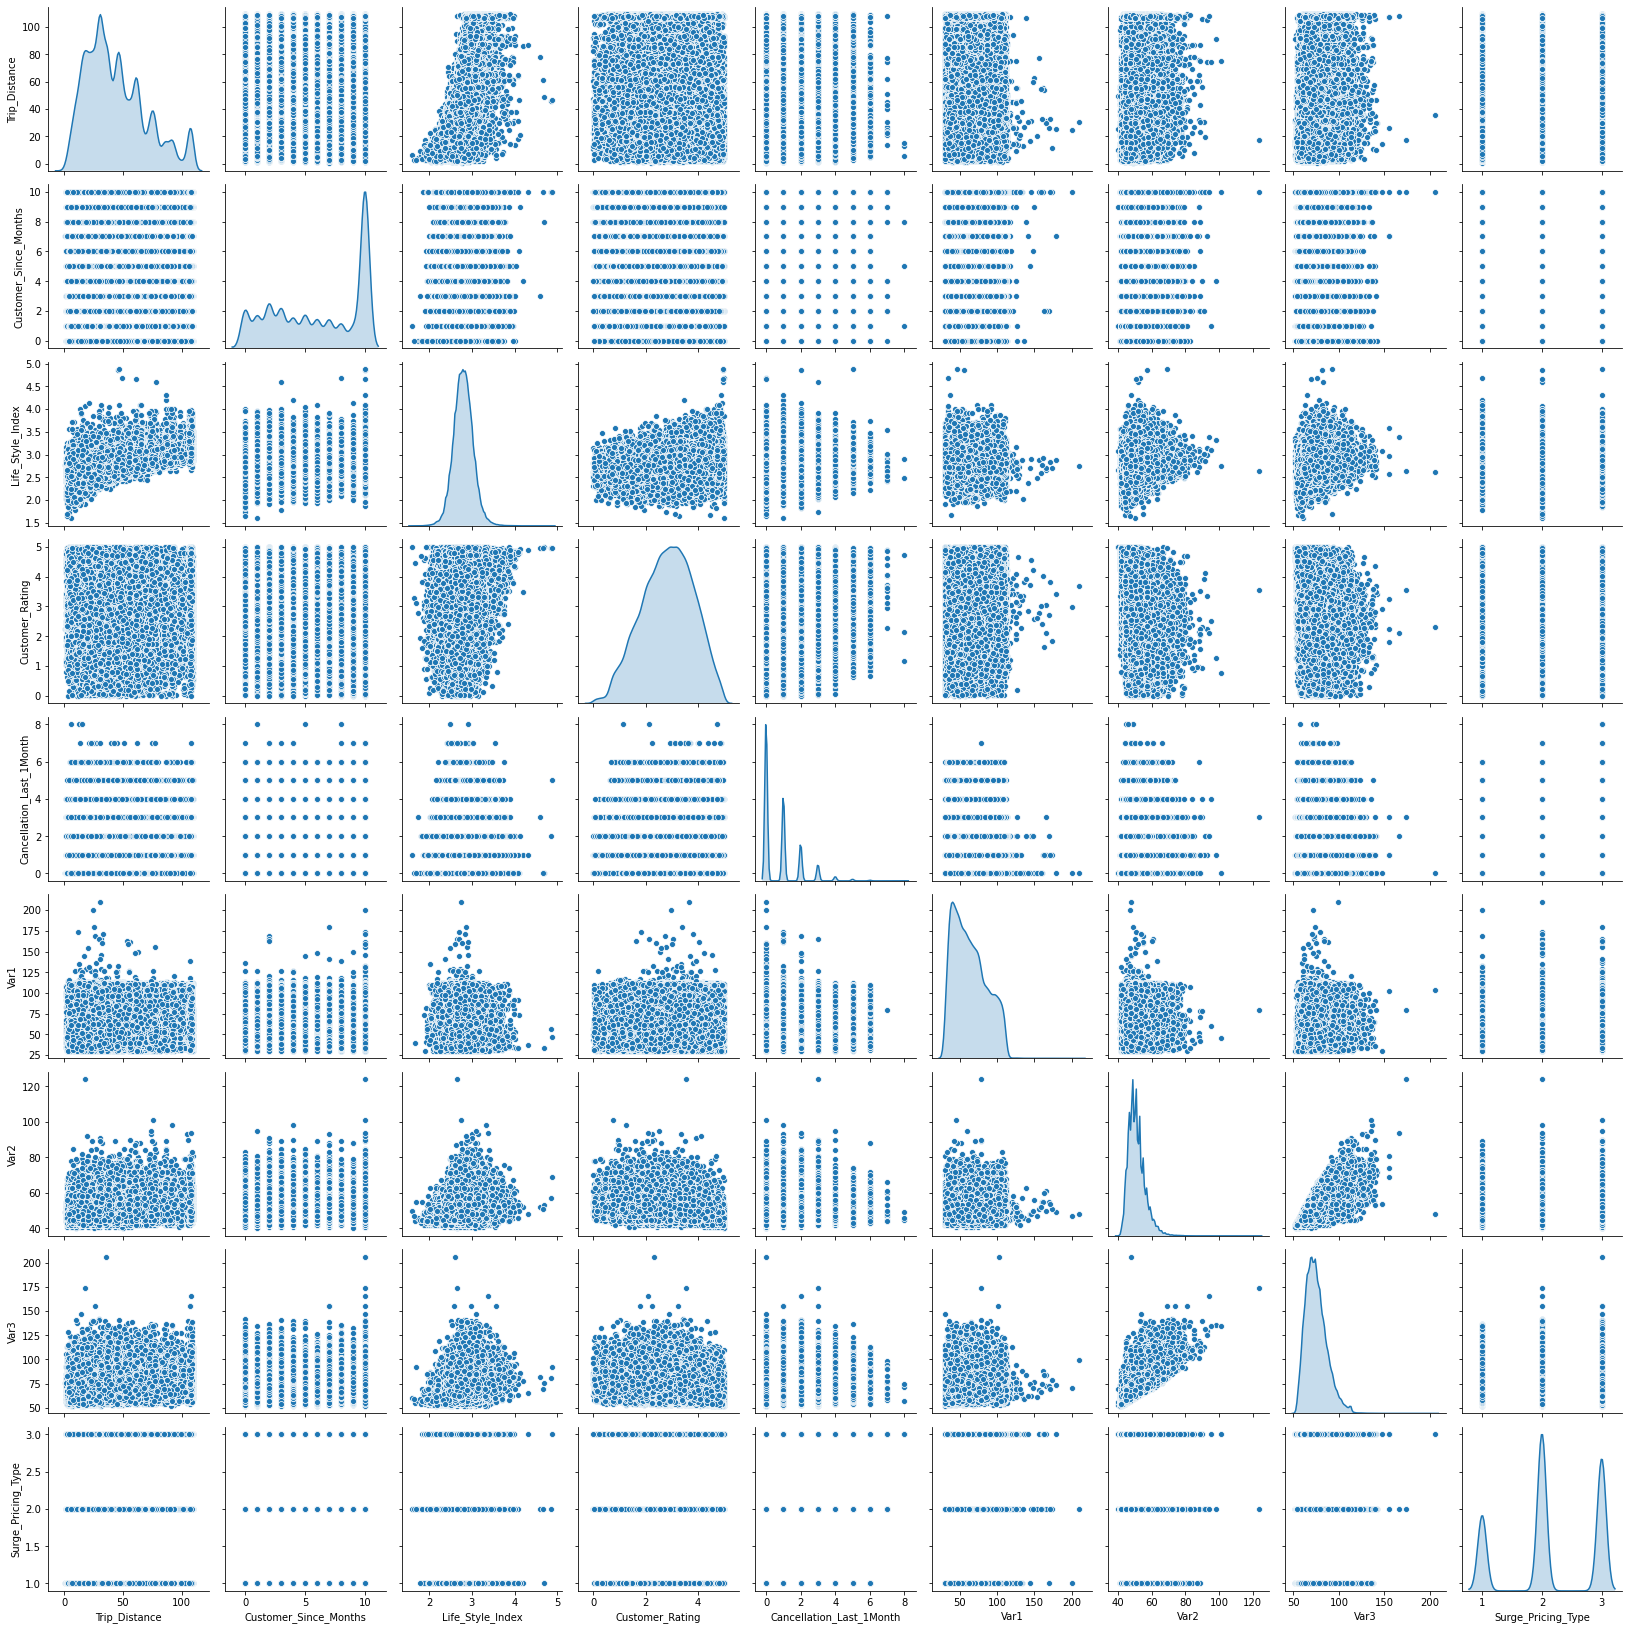

In [431]:
sns.pairplot(df,diag_kind=('kde'))
plt.show()

# Heatmap

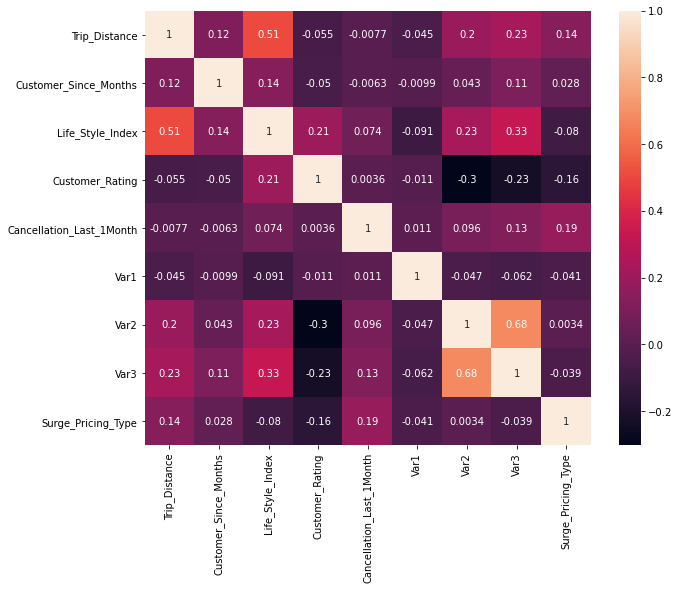

In [432]:
plt.figure(figsize=(10,8))
df_corr =df.corr()
sns.heatmap(df_corr,annot = True)
plt.show()


# Null values   

In [433]:
# Numerical null values
pd.DataFrame([df_num.isnull().sum(),df_num.isnull().sum()/df_num.shape[0]*100],index=['Numerical null values','Percentage of null values']).T

,Numerical null values,Percentage of null values
Trip_Distance,0.0,0.000000
Customer_Since_Months,5920.0,4.496362
Life_Style_Index,20193.0,15.336999
Customer_Rating,0.0,0.000000
Cancellation_Last_1Month,0.0,0.000000
Var1,71030.0,53.948748
Var2,0.0,0.000000
Var3,0.0,0.000000
Surge_Pricing_Type,0.0,0.000000


In [434]:
# Categorical null values
pd.DataFrame([df_catg.isnull().sum(),df_catg.isnull().sum()/df_catg.shape[0]*100],index=['Categorical null values','Percentage of null values']).T

,Categorical null values,Percentage of null values
Trip_ID,0.0,0.000000
Type_of_Cab,20210.0,15.349911
Confidence_Life_Style_Index,20193.0,15.336999
Destination_Type,0.0,0.000000
Gender,0.0,0.000000


Variable name : Trip_Distance


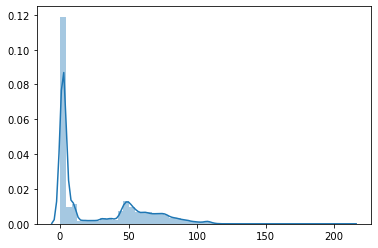

Variable name : Customer_Since_Months


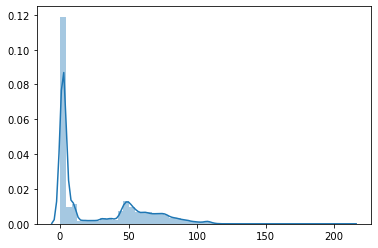

Variable name : Life_Style_Index


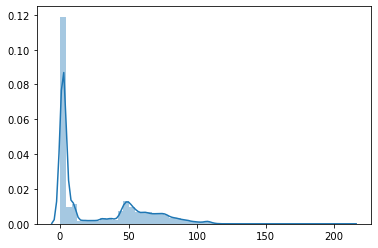

Variable name : Customer_Rating


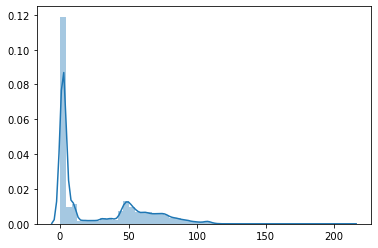

Variable name : Cancellation_Last_1Month


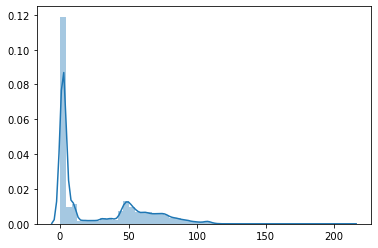

Variable name : Var1


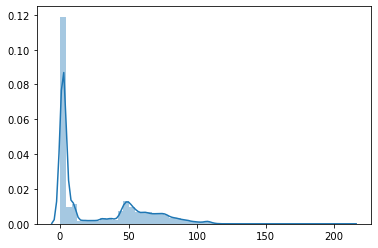

Variable name : Var2


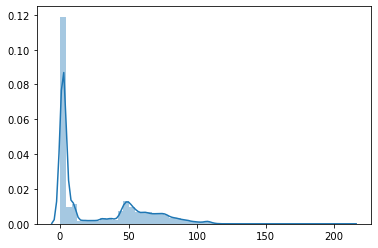

Variable name : Var3


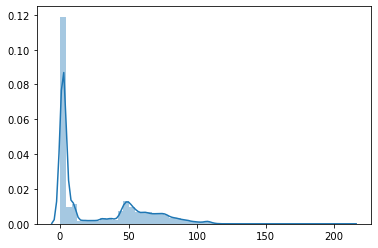

Variable name : Surge_Pricing_Type


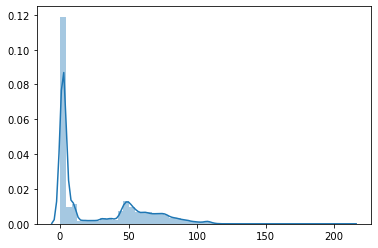

In [435]:
for i in df_num:
    print('Variable name :',i)
    sns.distplot(df_num)
    plt.show()

In [436]:
pd.DataFrame([df_num.isnull().sum(),df_num.isnull().sum()/df_num.shape[0]*100],index=['Numerical null values','Percentage of null values']).T

,Numerical null values,Percentage of null values
Trip_Distance,0.0,0.000000
Customer_Since_Months,5920.0,4.496362
Life_Style_Index,20193.0,15.336999
Customer_Rating,0.0,0.000000
Cancellation_Last_1Month,0.0,0.000000
Var1,71030.0,53.948748
Var2,0.0,0.000000
Var3,0.0,0.000000
Surge_Pricing_Type,0.0,0.000000


In [437]:
# Imputing numerical null values with median

df_num['Customer_Since_Months'] = df_num['Customer_Since_Months'].fillna(df_num['Customer_Since_Months'].median())
df_num['Life_Style_Index'] = df_num['Life_Style_Index'].fillna(df_num['Life_Style_Index'].median())

<ipython-input-437-4c0edc18a789>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num['Customer_Since_Months'] = df_num['Customer_Since_Months'].fillna(df_num['Customer_Since_Months'].median())
<ipython-input-437-4c0edc18a789>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num['Life_Style_Index'] = df_num['Life_Style_Index'].fillna(df_num['Life_Style_Index'].median())


In [438]:
df_num = df_num.drop(['Var1'],axis = 1)

In [439]:
pd.DataFrame([df_num.isnull().sum(),df_num.isnull().sum()/df_num.shape[0]*100],index=['Numerical null values','Percentage of null values']).T

,Numerical null values,Percentage of null values
Trip_Distance,0.0,0.0
Customer_Since_Months,0.0,0.0
Life_Style_Index,0.0,0.0
Customer_Rating,0.0,0.0
Cancellation_Last_1Month,0.0,0.0
Var2,0.0,0.0
Var3,0.0,0.0
Surge_Pricing_Type,0.0,0.0


In [440]:
# Imputing Categorical variables

df_catg['Type_of_Cab'] = df_catg['Type_of_Cab'].fillna(df_catg['Type_of_Cab'].mode()[0])
df_catg['Confidence_Life_Style_Index'] = df_catg['Confidence_Life_Style_Index'].fillna(df_catg['Confidence_Life_Style_Index'].mode()[0])

<ipython-input-440-50dd3c6a1f77>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_catg['Type_of_Cab'] = df_catg['Type_of_Cab'].fillna(df_catg['Type_of_Cab'].mode()[0])
<ipython-input-440-50dd3c6a1f77>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_catg['Confidence_Life_Style_Index'] = df_catg['Confidence_Life_Style_Index'].fillna(df_catg['Confidence_Life_Style_Index'].mode()[0])


In [441]:

pd.DataFrame([df_catg.isnull().sum(),df_catg.isnull().sum()/df_catg.shape[0]*100],index=['Categorical null values','Percentage of null values']).T

,Categorical null values,Percentage of null values
Trip_ID,0.0,0.0
Type_of_Cab,0.0,0.0
Confidence_Life_Style_Index,0.0,0.0
Destination_Type,0.0,0.0
Gender,0.0,0.0


In [442]:
df1 = pd.concat([df_num,df_catg],axis = 1)
df1.head()

,Trip_Distance,Customer_Since_Months,Life_Style_Index,Customer_Rating,Cancellation_Last_1Month,Var2,Var3,Surge_Pricing_Type,Trip_ID,Type_of_Cab,Confidence_Life_Style_Index,Destination_Type,Gender
0,6.77,1.0,2.42769,3.90500,0,46,60,2,T0005689460,B,A,A,Female
1,29.47,10.0,2.78245,3.45000,0,56,78,2,T0005689461,B,B,A,Male
2,41.58,10.0,2.79805,3.50125,2,56,77,2,T0005689464,B,B,E,Male
3,61.56,10.0,2.79805,3.45375,0,52,74,3,T0005689465,C,B,A,Male
4,54.95,10.0,3.03453,3.40250,4,49,102,2,T0005689467,C,B,A,Male


# Encoding

# Label Encoding

In [443]:
from sklearn.preprocessing import LabelEncoder

In [444]:
le = LabelEncoder()
df1['Destinations'] = le.fit_transform(df1['Destination_Type'])
df1.head()

,Trip_Distance,Customer_Since_Months,Life_Style_Index,Customer_Rating,Cancellation_Last_1Month,Var2,Var3,Surge_Pricing_Type,Trip_ID,Type_of_Cab,Confidence_Life_Style_Index,Destination_Type,Gender,Destinations
0,6.77,1.0,2.42769,3.90500,0,46,60,2,T0005689460,B,A,A,Female,0
1,29.47,10.0,2.78245,3.45000,0,56,78,2,T0005689461,B,B,A,Male,0
2,41.58,10.0,2.79805,3.50125,2,56,77,2,T0005689464,B,B,E,Male,4
3,61.56,10.0,2.79805,3.45375,0,52,74,3,T0005689465,C,B,A,Male,0
4,54.95,10.0,3.03453,3.40250,4,49,102,2,T0005689467,C,B,A,Male,0


# One hot encoding

In [445]:
df2 = pd.get_dummies(df1,columns = ['Type_of_Cab','Confidence_Life_Style_Index','Gender'],drop_first=True)
df2.head()

,Trip_Distance,Customer_Since_Months,Life_Style_Index,Customer_Rating,Cancellation_Last_1Month,Var2,Var3,Surge_Pricing_Type,Trip_ID,Destination_Type,Destinations,Type_of_Cab_B,Type_of_Cab_C,Type_of_Cab_D,Type_of_Cab_E,Confidence_Life_Style_Index_B,Confidence_Life_Style_Index_C,Gender_Male
0,6.77,1.0,2.42769,3.90500,0,46,60,2,T0005689460,A,0,1,0,0,0,0,0,0
1,29.47,10.0,2.78245,3.45000,0,56,78,2,T0005689461,A,0,1,0,0,0,1,0,1
2,41.58,10.0,2.79805,3.50125,2,56,77,2,T0005689464,E,4,1,0,0,0,1,0,1
3,61.56,10.0,2.79805,3.45375,0,52,74,3,T0005689465,A,0,0,1,0,0,1,0,1
4,54.95,10.0,3.03453,3.40250,4,49,102,2,T0005689467,A,0,0,1,0,0,1,0,1


In [446]:
df2.drop(columns = ['Trip_ID','Destination_Type'],inplace = True)
df2.head()

,Trip_Distance,Customer_Since_Months,Life_Style_Index,Customer_Rating,Cancellation_Last_1Month,Var2,Var3,Surge_Pricing_Type,Destinations,Type_of_Cab_B,Type_of_Cab_C,Type_of_Cab_D,Type_of_Cab_E,Confidence_Life_Style_Index_B,Confidence_Life_Style_Index_C,Gender_Male
0,6.77,1.0,2.42769,3.90500,0,46,60,2,0,1,0,0,0,0,0,0
1,29.47,10.0,2.78245,3.45000,0,56,78,2,0,1,0,0,0,1,0,1
2,41.58,10.0,2.79805,3.50125,2,56,77,2,4,1,0,0,0,1,0,1
3,61.56,10.0,2.79805,3.45375,0,52,74,3,0,0,1,0,0,1,0,1
4,54.95,10.0,3.03453,3.40250,4,49,102,2,0,0,1,0,0,1,0,1


# Outliers detection

Variable name : Trip_Distance


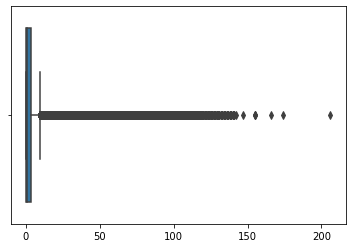

Variable name : Customer_Since_Months


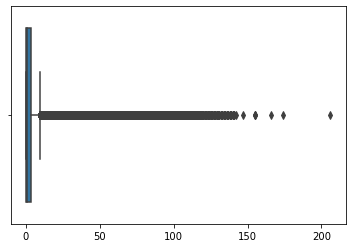

Variable name : Life_Style_Index


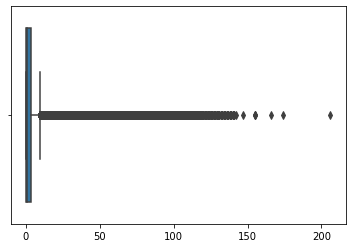

Variable name : Customer_Rating


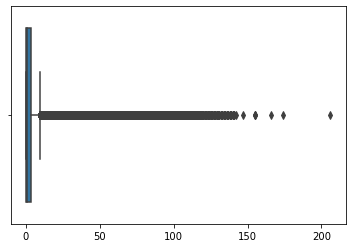

Variable name : Cancellation_Last_1Month


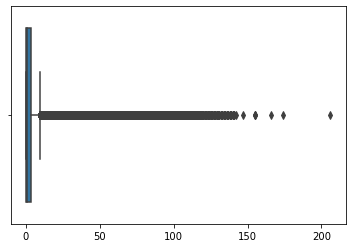

Variable name : Var2


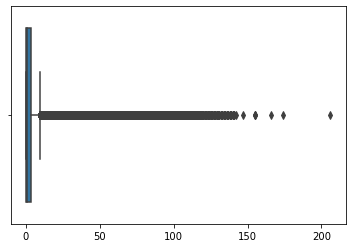

Variable name : Var3


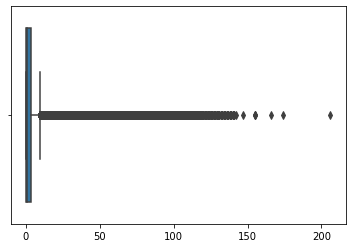

Variable name : Surge_Pricing_Type


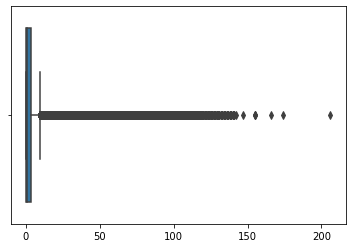

Variable name : Destinations


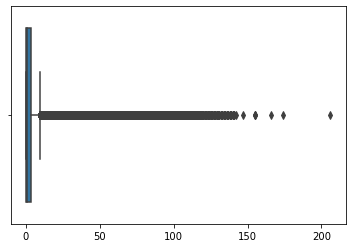

Variable name : Type_of_Cab_B


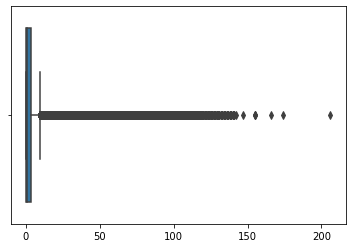

Variable name : Type_of_Cab_C


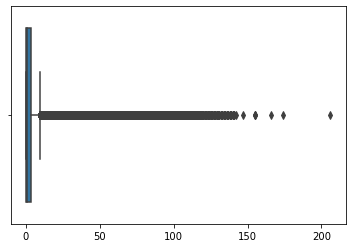

Variable name : Type_of_Cab_D


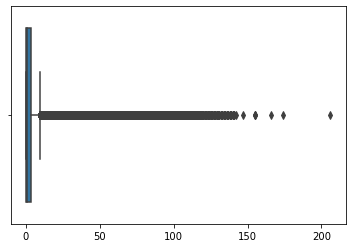

Variable name : Type_of_Cab_E


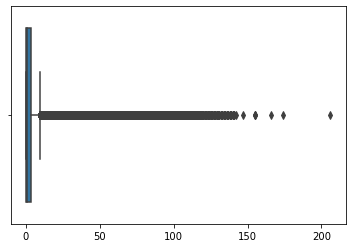

Variable name : Confidence_Life_Style_Index_B


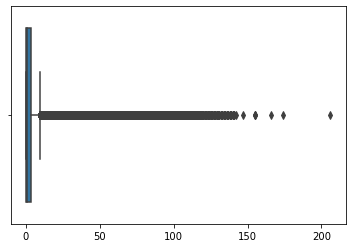

Variable name : Confidence_Life_Style_Index_C


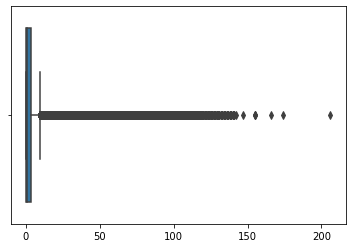

Variable name : Gender_Male


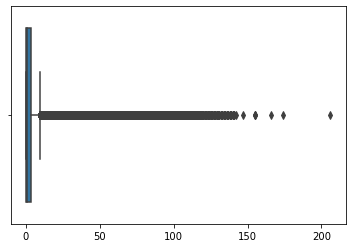

In [447]:
for i in df2.columns:
    print('Variable name :',i)
    sns.boxplot(df2)
    plt.show()

In [448]:
# As we see that outliers are more we use Power transformer method to transform the data

In [449]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()

In [450]:
df2.columns

Index(['Trip_Distance', 'Customer_Since_Months', 'Life_Style_Index',
       'Customer_Rating', 'Cancellation_Last_1Month', 'Var2', 'Var3',
       'Surge_Pricing_Type', 'Destinations', 'Type_of_Cab_B', 'Type_of_Cab_C',
       'Type_of_Cab_D', 'Type_of_Cab_E', 'Confidence_Life_Style_Index_B',
       'Confidence_Life_Style_Index_C', 'Gender_Male'],
      dtype='object')

In [451]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131662 entries, 0 to 131661
Data columns (total 16 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Trip_Distance                  131662 non-null  float64
 1   Customer_Since_Months          131662 non-null  float64
 2   Life_Style_Index               131662 non-null  float64
 3   Customer_Rating                131662 non-null  float64
 4   Cancellation_Last_1Month       131662 non-null  int64  
 5   Var2                           131662 non-null  int64  
 6   Var3                           131662 non-null  int64  
 7   Surge_Pricing_Type             131662 non-null  int64  
 8   Destinations                   131662 non-null  int32  
 9   Type_of_Cab_B                  131662 non-null  uint8  
 10  Type_of_Cab_C                  131662 non-null  uint8  
 11  Type_of_Cab_D                  131662 non-null  uint8  
 12  Type_of_Cab_E                 

In [452]:
df2_num = ['Trip_Distance','Customer_Since_Months','Life_Style_Index','Customer_Rating','Cancellation_Last_1Month','Var2', 'Var3','Destinations']
df2_catg = ['Surge_Pricing_Type','Type_of_Cab_B', 'Type_of_Cab_C','Type_of_Cab_D', 'Type_of_Cab_E', 'Confidence_Life_Style_Index_B','Confidence_Life_Style_Index_C', 'Gender_Male']

In [453]:
df_pt1_ = df2.copy(deep = True)

In [454]:
df_pt1_.drop(columns=df2_catg, inplace=True, axis=1)

In [455]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()
df1_pt = pd.DataFrame(pt.fit_transform(df_pt1_), columns=df_pt1_.columns)

In [456]:
df1_pt_ = pd.concat([df1_pt, df2[df2_catg]],axis = 1)
df1_pt_.head()

,Trip_Distance,Customer_Since_Months,Life_Style_Index,Customer_Rating,Cancellation_Last_1Month,Var2,Var3,Destinations,Surge_Pricing_Type,Type_of_Cab_B,Type_of_Cab_C,Type_of_Cab_D,Type_of_Cab_E,Confidence_Life_Style_Index_B,Confidence_Life_Style_Index_C,Gender_Male
0,-2.049363,-1.433437,-1.846794,1.087559,-0.927712,-1.199071,-1.538782,-0.813149,2,1,0,0,0,0,0,0
1,-0.449525,1.105708,-0.072572,0.600646,-0.927712,1.056701,0.399631,-0.813149,2,1,0,0,0,1,0,1
2,0.081374,1.105708,0.002724,0.655010,1.284503,1.056701,0.315415,1.609862,2,1,0,0,0,1,0,1
3,0.778507,1.105708,0.002724,0.604619,-0.927712,0.342784,0.049292,-0.813149,3,0,1,0,0,1,0,1
4,0.565882,1.105708,1.118527,0.550371,1.735548,-0.341556,1.930164,-0.813149,2,0,1,0,0,1,0,1


Variable name : Trip_Distance


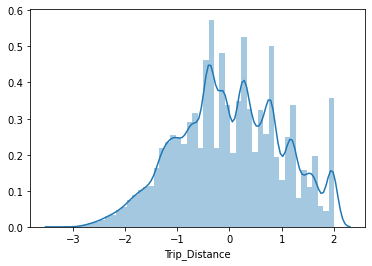

Variable name : Customer_Since_Months


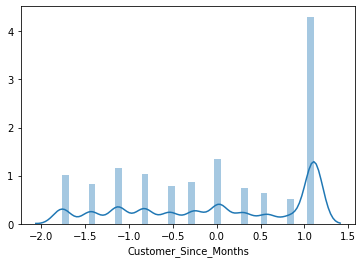

Variable name : Life_Style_Index


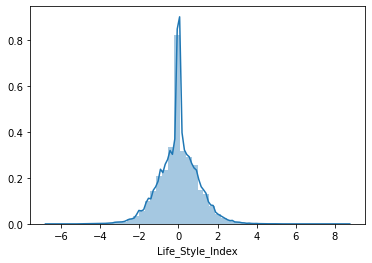

Variable name : Customer_Rating


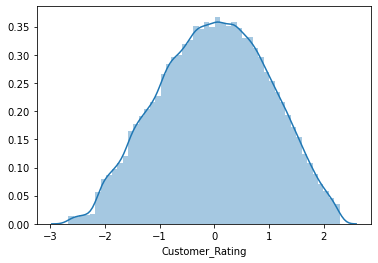

Variable name : Cancellation_Last_1Month


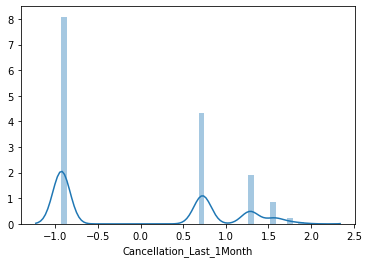

Variable name : Var2


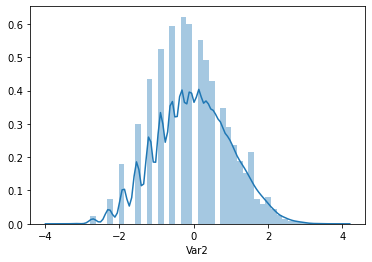

Variable name : Var3


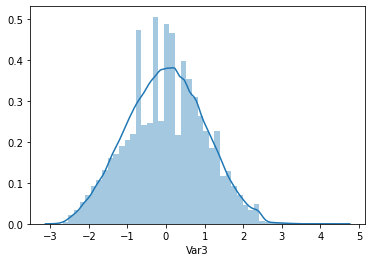

Variable name : Destinations


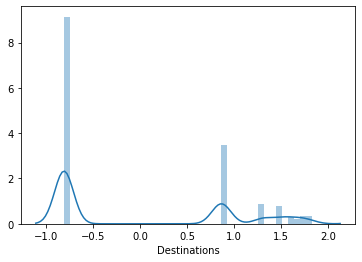

In [457]:
# Check for normality for transformed data
for col in df1_pt.columns:
    print('Variable name :', col)
    sns.distplot(df1_pt[col])
    plt.show()

# Statistical approach

In [458]:
from scipy import stats

In [459]:
df1_pt_.columns

Index(['Trip_Distance', 'Customer_Since_Months', 'Life_Style_Index',
       'Customer_Rating', 'Cancellation_Last_1Month', 'Var2', 'Var3',
       'Destinations', 'Surge_Pricing_Type', 'Type_of_Cab_B', 'Type_of_Cab_C',
       'Type_of_Cab_D', 'Type_of_Cab_E', 'Confidence_Life_Style_Index_B',
       'Confidence_Life_Style_Index_C', 'Gender_Male'],
      dtype='object')

In [460]:
cols = ['Type_of_Cab_B', 'Type_of_Cab_C','Type_of_Cab_D', 'Type_of_Cab_E', 'Confidence_Life_Style_Index_B','Confidence_Life_Style_Index_C', 'Gender_Male']

In [461]:
# Exclude categorical variables and check for normality
df3_1 = df1_pt_[df1_pt_['Surge_Pricing_Type'] == 1].drop(columns=cols, axis=1)
df3_2 = df1_pt_[df1_pt_['Surge_Pricing_Type'] == 2].drop(columns=cols, axis=1)
df3_3 = df1_pt_[df1_pt_['Surge_Pricing_Type'] == 3].drop(columns=cols, axis=1)

In [462]:
# Normality test for all numerical variables
# Ho : Variables are normal
# Ha : Variables are not normal


pval_1 = []
pval_2 = []
pval_3 = []
for col in df3_1.drop('Surge_Pricing_Type', axis=1):
        pval_1.append(stats.shapiro(df3_1[col])[1])
        pval_2.append(stats.shapiro(df3_2[col])[1])
        pval_3.append(stats.shapiro(df3_3[col])[1])

pd.DataFrame(data=[pval_1, pval_2, pval_3], index=['pval_1', 'pval_2', 'pval_3'], columns=df3_1.drop('Surge_Pricing_Type', axis=1).columns)

C:\Users\Tejesh Bathula\anaconda3\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


,Trip_Distance,Customer_Since_Months,Life_Style_Index,Customer_Rating,Cancellation_Last_1Month,Var2,Var3,Destinations
pval_1,6.406023e-33,0.0,0.0,4.127426e-37,0.0,9.038300e-33,6.244145e-21,0.0
pval_2,1.157192e-41,0.0,0.0,2.802597e-44,0.0,1.905205e-41,4.420252e-32,0.0
pval_3,0.000000e+00,0.0,0.0,6.290429e-42,0.0,3.155848e-38,6.134529e-33,0.0


In [463]:
# Ho : Variable is have no relation with target (Surge_pricing_type)
# Ha : Variable is have relation with target (Surge_pricing_type)

pval = []
for col in df3_1.drop('Surge_Pricing_Type', axis=1):
        pval.append(stats.kruskal(df3_1[col], df3_2[col], df3_3[col])[1])
        
pd.DataFrame(pval, columns=['Pvalue'], index=df3_1.drop('Surge_Pricing_Type', axis=1).columns).T

,Trip_Distance,Customer_Since_Months,Life_Style_Index,Customer_Rating,Cancellation_Last_1Month,Var2,Var3,Destinations
Pvalue,0.0,1.775008e-23,1.028290e-266,0.0,0.0,1.894454e-18,5.012962e-100,1.580769e-127


In [464]:
# Check relation with target for categorical variables
df3_cat = df1_pt_[cols]

In [465]:
pval = []

for col in df3_cat:
    p = pd.crosstab(df1_pt_['Surge_Pricing_Type'], df3_cat[col])
    pval.append(stats.chi2_contingency(p)[1])

pd.DataFrame(pval, columns=['Pvalue'], index=df3_cat.columns).T

,Type_of_Cab_B,Type_of_Cab_C,Type_of_Cab_D,Type_of_Cab_E,Confidence_Life_Style_Index_B,Confidence_Life_Style_Index_C,Gender_Male
Pvalue,0.0,0.0,0.0,0.0,0.0,1.805218e-08,0.262892


In [475]:
df3_1.head()

,Trip_Distance,Customer_Since_Months,Life_Style_Index,Customer_Rating,Cancellation_Last_1Month,Var2,Var3,Destinations,Surge_Pricing_Type
13,-0.368257,0.026849,-0.514958,-0.735240,-0.927712,0.540055,1.265827,-0.813149,1
17,-1.369916,-0.826293,0.855812,2.221264,-0.927712,-0.890761,-1.015230,1.717997,1
20,1.102353,-1.760263,1.246804,-0.799354,-0.927712,0.342784,1.202467,-0.813149,1
25,-1.177697,-1.433437,-0.473545,-1.254593,1.565809,0.342784,0.934293,-0.813149,1
27,-1.064866,0.840633,-0.096462,-1.417735,1.849213,0.895962,0.934293,-0.813149,1


# Conclusions

# --------------------------------------Thank You-------------------------------------